# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Sebastian | Vanegas Perez | Sebastian Vanegas Perez, | 6 | 25 |
| Member 2: | Subhreet | Jhinger | Subhreet Jhinger, | 6 | 25 |
| Member 3: | Abdullah | Ajlan | Abdullah Ajlan, | 6 | 25 |
| Member 4: | Lisa | Brantuo | Lisa Brantuo, | 6 | 25 |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

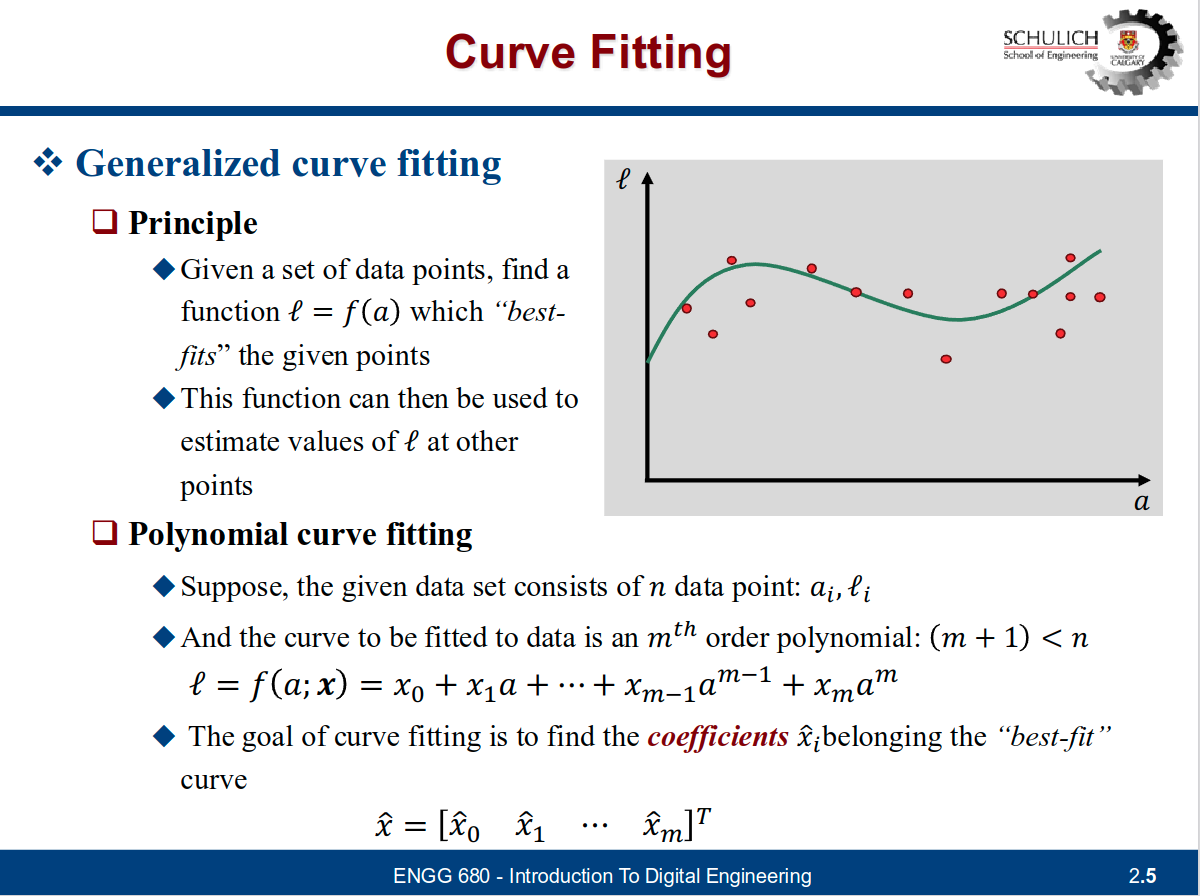

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install openpyxl

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
%cd /content/drive/MyDrive/engg680_2024_fall/Lab_2/

/content/drive/MyDrive/engg680_2024_fall/Lab_2


In [ ]:
!ls

Assignment2.ipynb  ENGG680_Lab2_F24_Handout.pdf  satellite_position.xlsx
data.xlsx	   pseudoranges.xlsx


In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_2/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data['l'].to_numpy()      # Noisy observations
l_var = df_data['l_var'].to_numpy()       # Variance of observations
l_true = df_data['l_true'].to_numpy()     # True observations

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


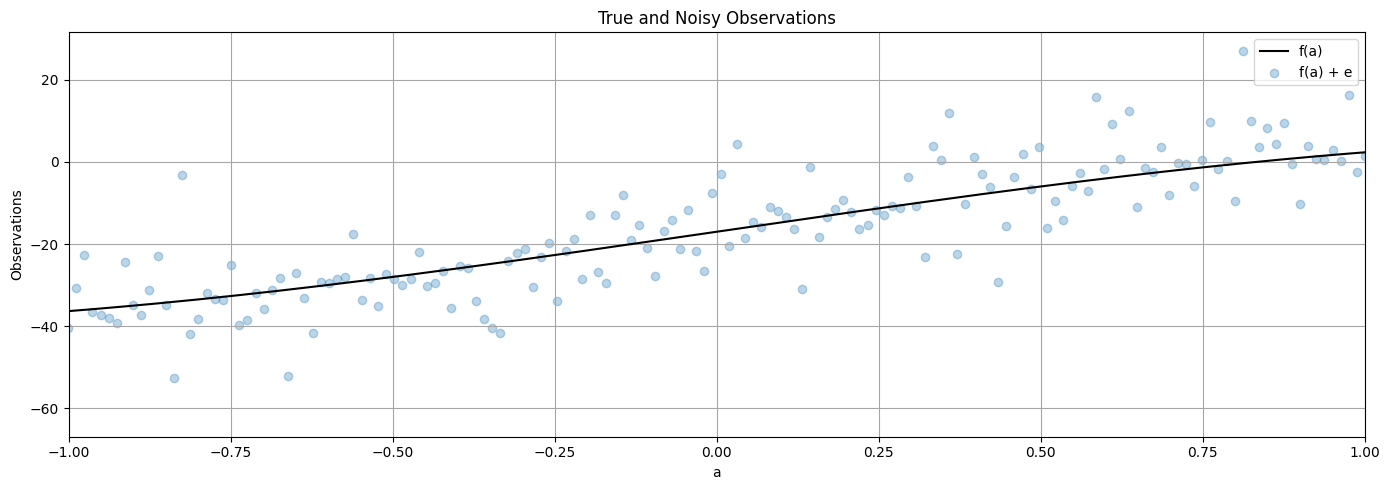

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Line plot for the true observations (f(a))
ax.plot(a, l_true, label="f(a)", color='k')

# Scatter plot for the noisy observations (f(a) + e)
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Add axis labels
ax.set_xlabel('a')
ax.set_ylabel('Observations')

# Add a legend
ax.legend()

# Add a title
ax.set_title('True and Noisy Observations')

# Set the x-axis range to -1 to 1
ax.set_xlim(-1, 1)

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Step 1: Construct the design matrix A based on the polynomial degree
    # A matrix consists of powers of input 'a'
    A = np.vander(a, deg + 1, increasing=True)  # Vandermonde matrix for polynomial fit

    # Step 2: Perform Linear Least Squares Estimation
    # (A^T * P * A) * x = A^T * P * l
    # where A is the design matrix, P is the weight matrix, l is the noisy observation vector

    # Calculate the normal equation components
    At_P = A.T @ P  # A^T * P
    N = At_P @ A    # Normal matrix (A^T * P * A)

    # Step 3: Solve for the polynomial coefficients 'x' using the normal equation
    # x = (A^T * P * A)^-1 * A^T * P * l
    x = np.linalg.inv(N) @ At_P @ l

    # Step 4: Calculate the covariance matrix of the estimated coefficients
    # cov_x = (A^T * P * A)^-1
    cov_x = np.linalg.inv(N)

    # Step 5: Calculate the residuals 'v'
    # v = l - A * x
    v = l - A @ x

    # Step 6: Calculate the a posteriori variance factor (goodness of fit)
    # apv = (v^T * P * v) / (n - m), where n = number of observations, m = number of parameters
    n = len(l)  # number of observations
    m = deg + 1  # number of parameters (degree of polynomial + 1 for intercept)
    apv = (v.T @ P @ v) / (n - m)


    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
x_line, cov_x_line, apv_line, v_line = fit_polynomial_curve(a, l, P, 1)
x_cubic, cov_x_cubic, apv_cubic, v_cubic = fit_polynomial_curve(a, l, P, 3)
x_quintic, cov_x_quintic, apv_quintic, v_quintic = fit_polynomial_curve(a, l, P, 5)

In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(x_line, a)
cubic_uw = np.polyval(x_cubic, a)
quintic_uw = np.polyval(x_quintic, a)

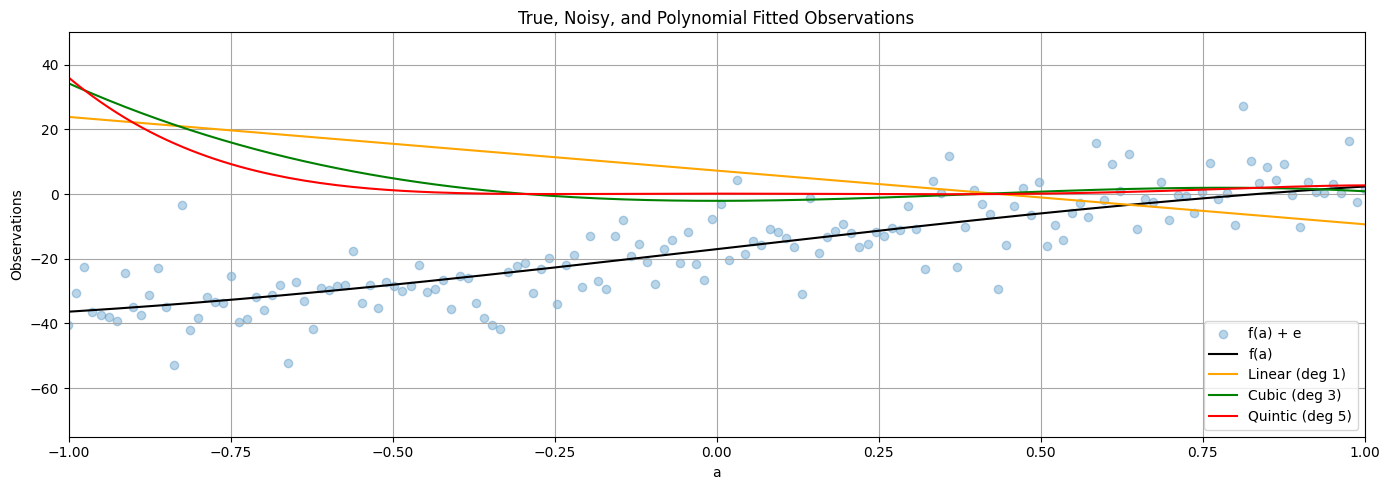

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Scatter plot for the noisy observations (f(a) + e)
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Line plot for the true observations (f(a))
ax.plot(a, l_true, label="f(a)", color='k')

# Plot the polynomial fits
ax.plot(a, line_uw, label="Linear (deg 1)", color='orange')   # Linear fit
ax.plot(a, cubic_uw, label="Cubic (deg 3)", color='green')    # Cubic fit
ax.plot(a, quintic_uw, label="Quintic (deg 5)", color='red')  # Quintic fit

# Set the x-axis range to -1 to 1
ax.set_xlim(-1, 1)

# Set the y-axis range to -75 to 50
ax.set_ylim(-75, 50)

# Add axis labels
ax.set_xlabel('a')
ax.set_ylabel('Observations')

# Add a title
ax.set_title('True, Noisy, and Polynomial Fitted Observations')

# Add a legend
ax.legend()

# Add grid lines
ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print("A posteriori variance factor for Linear (deg 1):", apv_line)
print("A posteriori variance factor for Cubic (deg 3):", apv_cubic)
print("A posteriori variance factor for Quintic (deg 5):", apv_quintic)

A posteriori variance factor for Linear (deg 1): 162.742608604322
A posteriori variance factor for Cubic (deg 3): 66.13227783131883
A posteriori variance factor for Quintic (deg 5): 63.75834463018419


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
norm_line = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

print("Norm for Linear (deg 1):", norm_line)
print("Norm for Cubic (deg 3):", norm_cubic)
print("Norm for Quintic (deg 5):", norm_quintic)

Norm for Linear (deg 1): 1123.2955569479318
Norm for Cubic (deg 3): 5090.214521501091
Norm for Quintic (deg 5): 38448.8531900869


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

print("""
The quintic and cubic polynomial models fit noisy observations better than the linear model,
with smaller variance factors. The quintic model has the lowest variance factor, indicating
better trend representation.

The norm measures the difference between expected and actual observations, with lower norms
indicating better approximation. Linear models have the smallest norm, while quintic models
have the highest norm value despite having the lowest a posteriori variance factor.

The study suggests that complex models like quintic and cubic may better fit noisy data,
but their higher norm may lead to overfitting, emphasizing the need to balance model complexity
with the risk of overfitting.
""")


The quintic and cubic polynomial models fit noisy observations better than the linear model,
with smaller variance factors. The quintic model has the lowest variance factor, indicating
better trend representation.

The norm measures the difference between expected and actual observations, with lower norms
indicating better approximation. Linear models have the smallest norm, while quintic models
have the highest norm value despite having the lowest a posteriori variance factor.

The study suggests that complex models like quintic and cubic may better fit noisy data,
but their higher norm may lead to overfitting, emphasizing the need to balance model complexity
with the risk of overfitting.



In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(l_var)

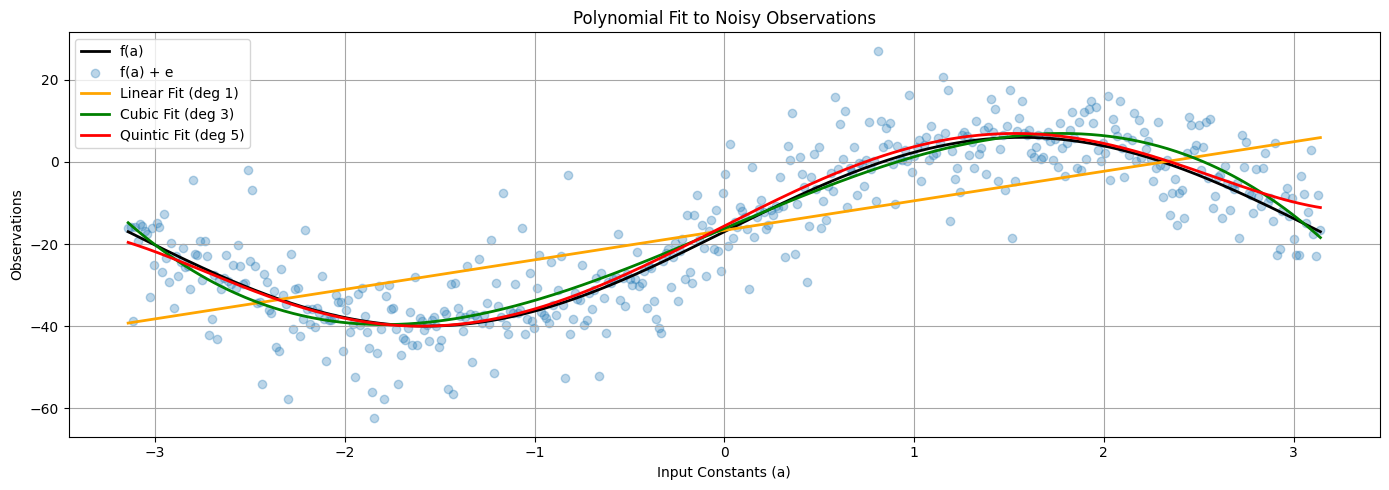

A posteriori variance factor for Linear (deg 1): 14431.266355603284
A posteriori variance factor for Cubic (deg 3): 7803.4118774491135
A posteriori variance factor for Quintic (deg 5): 7554.4632113914995
Norm for Linear (deg 1): 228.88326682066946
Norm for Cubic (deg 3): 43.562483272918385
Norm for Quintic (deg 5): 30.65505574159218


In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# Step 6: Call the fit_polynomial_curve function and fetch the results
# Using degrees of: 1, 3, 5
x_deg1, cov_x_deg1, apv_line, v_line = fit_polynomial_curve(a, l, P, deg=1)
x_deg3, cov_x_deg3, apv_cubic, v_cubic = fit_polynomial_curve(a, l, P, deg=3)
x_deg5, cov_x_deg5, apv_quintic, v_quintic = fit_polynomial_curve(a, l, P, deg=5)

# Step 7: Construct polynomial functions for each degree
line_uw = np.polyval(x_deg1[::-1], a)     # Evaluate polynomial for degree 1
cubic_uw = np.polyval(x_deg3[::-1], a)    # Evaluate polynomial for degree 3
quintic_uw = np.polyval(x_deg5[::-1], a)  # Evaluate polynomial for degree 5

# Step 8: Use matplotlib to plot each polynomial function, noisy observations l, true observations l_true
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plotting true observations
ax.plot(a, l_true, color='k', label='f(a)', linewidth=2)

# Plotting noisy observations
ax.scatter(a, l, color='tab:blue', label='f(a) + e', marker='o', alpha=0.3)

# Plotting polynomial fits
ax.plot(a, line_uw, color='orange', label='Linear Fit (deg 1)', linewidth=2)
ax.plot(a, cubic_uw, color='green', label='Cubic Fit (deg 3)', linewidth=2)
ax.plot(a, quintic_uw, color='red', label='Quintic Fit (deg 5)', linewidth=2)

# Set axis labels, title, and legend
ax.set_xlabel('Input Constants (a)')
ax.set_ylabel('Observations')
ax.set_title('Polynomial Fit to Noisy Observations')
ax.legend()

ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()
plt.show()

# Step 9: Print the a posteriori variance factor for each polynomial function
print("A posteriori variance factor for Linear (deg 1):", apv_line)
print("A posteriori variance factor for Cubic (deg 3):", apv_cubic)
print("A posteriori variance factor for Quintic (deg 5):", apv_quintic)

# Step 10: Compute and print the norm between the predicted observations and the true observations
line_uw_new = np.polyval(x_deg1[::-1], a)      # New predictions using the proper P matrix
cubic_uw_new = np.polyval(x_deg3[::-1], a)
quintic_uw_new = np.polyval(x_deg5[::-1], a)

norm_line_new = np.linalg.norm(line_uw_new - l_true)
norm_cubic_new = np.linalg.norm(cubic_uw_new - l_true)
norm_quintic_new = np.linalg.norm(quintic_uw_new - l_true)

print("Norm for Linear (deg 1):", norm_line_new)
print("Norm for Cubic (deg 3):", norm_cubic_new)
print("Norm for Quintic (deg 5):", norm_quintic_new)

In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

print("""
The unweighted LSE had higher a posteriori variance factors, suggesting less accurate
and erratic model fit when noisy observations were present. The weighted LSE, however,
showed significantly lower a posteriori variance factors, indicating better model fit
by using data variance as weights.

Typical Expected Observations: Unweighted LSE indicates a greater disparity between true
and predicted observations, resulting in worse fit and more overall error. Weighted LSE,
on the other hand, indicates a better fit to real observations, reducing discrepancies.

The study reveals that adding weights significantly enhances the model's accuracy by
considering data variance and generating more accurate polynomial coefficients and forecasts.
Prioritizing dependable data points in the weighted LSE results in a more accurate polynomial
fit. The model's robustness is enhanced by using appropriate statistical methods that consider
data quality, enhancing its ability to generalize to new data.

In conclusion, The weighted LSE application in this analysis improved the norm and a posteriori
variance factor, highlighting the importance of data quality in statistical modeling, especially
when noise is present.
""")


The unweighted LSE had higher a posteriori variance factors, suggesting less accurate
and erratic model fit when noisy observations were present. The weighted LSE, however,
showed significantly lower a posteriori variance factors, indicating better model fit
by using data variance as weights.

Typical Expected Observations: Unweighted LSE indicates a greater disparity between true
and predicted observations, resulting in worse fit and more overall error. Weighted LSE,
on the other hand, indicates a better fit to real observations, reducing discrepancies.

The study reveals that adding weights significantly enhances the model's accuracy by
considering data variance and generating more accurate polynomial coefficients and forecasts.
Prioritizing dependable data points in the weighted LSE results in a more accurate polynomial
fit. The model's robustness is enhanced by using appropriate statistical methods that consider
data quality, enhancing its ability to generalize to new data.

In co

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

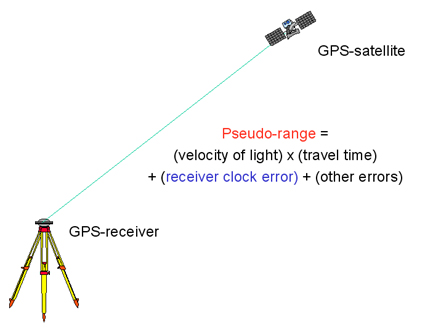

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.identity(n)

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  receiver_pos_expanded = receiver_pos[np.newaxis, :]
  diff = satellite_pos[:, :3] - receiver_pos_expanded
  distance = np.sqrt(np.sum(diff**2, axis=1))
  return distance

In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  n = s_pos.shape[0]
  A = np.zeros((n, 4))

  # Speed of light in meters per second (c = 299792458 m/s)
  c = 299792458

  for i in range(n):
    A[i, 0] = -(s_pos[i, 0] - r_pos[0]) / rho[i]
    A[i, 1] = -(s_pos[i, 1] - r_pos[1]) / rho[i]
    A[i, 2] = -(s_pos[i, 2] - r_pos[2]) / rho[i]

    A[i, 3] = -c

  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
pseudorange_measurements = pseudorange[:, 0]

while np.max(np.abs(delta[:3])) >= 0.001:
  # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
  # (1 marks)
  rho = euclidean_norm(x_hat[:3], sat_pos)

  # compute the design matrix A
  # (1 marks)
  A = design_matrix(x_hat, sat_pos, rho)

  # compute the misclosure array w
  # (1 marks)
  w = pseudorange_measurements - rho

  # compute the corrections delta
  # (1 marks)
  delta = np.linalg.lstsq(A, w, rcond=None)[0]

  # update the states
  # (1 marks)
  x_hat += delta


  # compute the position error from using the updated states against groundtruth
  # (1 marks)
  err_pos = x_hat[:3] - GroundTruth

  # update the counter i, (i.e., increament of 1 for each iteration)
  # (1 mark)
  i += 1

  # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
  # (1 marks)
  arr_w.append(w)
  arr_delta.append(delta)
  arr_err_pos.append(err_pos)
  arr_i.append(i)

# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = np.var(w)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.inv(A.T @ A)

In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print("Estimated states:", x_hat)
print("Corrections array:", delta)
print("Estimated measurements residuals:", w)
print("A posteriori Variance of Unit Weight:", apv)
print("Covariance matrix of estimated states:", C_x_hat)
print("Number of iterations:", i)
print("3-D position errors:", err_pos)

Estimated states: [-1.14542372e+00 -8.75662566e+05 -3.59693415e+06  1.01120681e+00]
Corrections array: [-1.07870655e-10  2.25593553e-04 -5.22700913e-04  6.32421653e-02]
Estimated measurements residuals: [-22753238.65028718 -17566072.27576099 -21323742.51833081
 -17131041.48402913 -22823071.68219314 -19915318.30148594
 -16788648.87585479 -17477079.36783229 -18732938.46660724
 -21733621.73987365 -12309992.65091212]
A posteriori Variance of Unit Weight: 9089178803403.924
Covariance matrix of estimated states: [[ 3.08982745e+24  4.85529690e+17 -4.28103453e+17 -1.12834805e+10]
 [ 4.85529690e+17  1.87533997e+12  1.07579624e+11 -1.06634764e+03]
 [-4.28103453e+17  1.07579624e+11  1.78316971e+12  2.80555097e+03]
 [-1.12834805e+10 -1.06634764e+03  2.80555097e+03  5.14833328e-05]]
Number of iterations: 16
3-D position errors: [ 1633488.23425353  2775964.61603198 -8549415.76833756]


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

print("""
The A Posteriori Variance of Unit Weight is 9.09 × 10³² m³, indicating significant differences between the model's
estimated distances and observed pseudorange measurements. This suggests the model may not match the data well or
make significant mistakes in observations, possibly due to incorrect receiver coordinates, excessive noise in pseudorange
measurements, or systemic problems like multipath faults and atmospheric influences. The high variation in estimated
parameters, such as clock offset and receiver location, indicates a low level of confidence in the estimation process.
The Covariance Matrix of Estimated States helps understand the uncertainty related to each estimated parameter, with
high numbers indicating significant uncertainty, particularly for the x-coordinate. Further research is needed to
identify inaccuracies and refine the positioning solution.
""")


The A Posteriori Variance of Unit Weight is 9.09 × 10³² m³, indicating significant differences between the model's
estimated distances and observed pseudorange measurements. This suggests the model may not match the data well or
make significant mistakes in observations, possibly due to incorrect receiver coordinates, excessive noise in pseudorange
measurements, or systemic problems like multipath faults and atmospheric influences. The high variation in estimated
parameters, such as clock offset and receiver location, indicates a low level of confidence in the estimation process.
The Covariance Matrix of Estimated States helps understand the uncertainty related to each estimated parameter, with
high numbers indicating significant uncertainty, particularly for the x-coordinate. Further research is needed to
identify inaccuracies and refine the positioning solution.



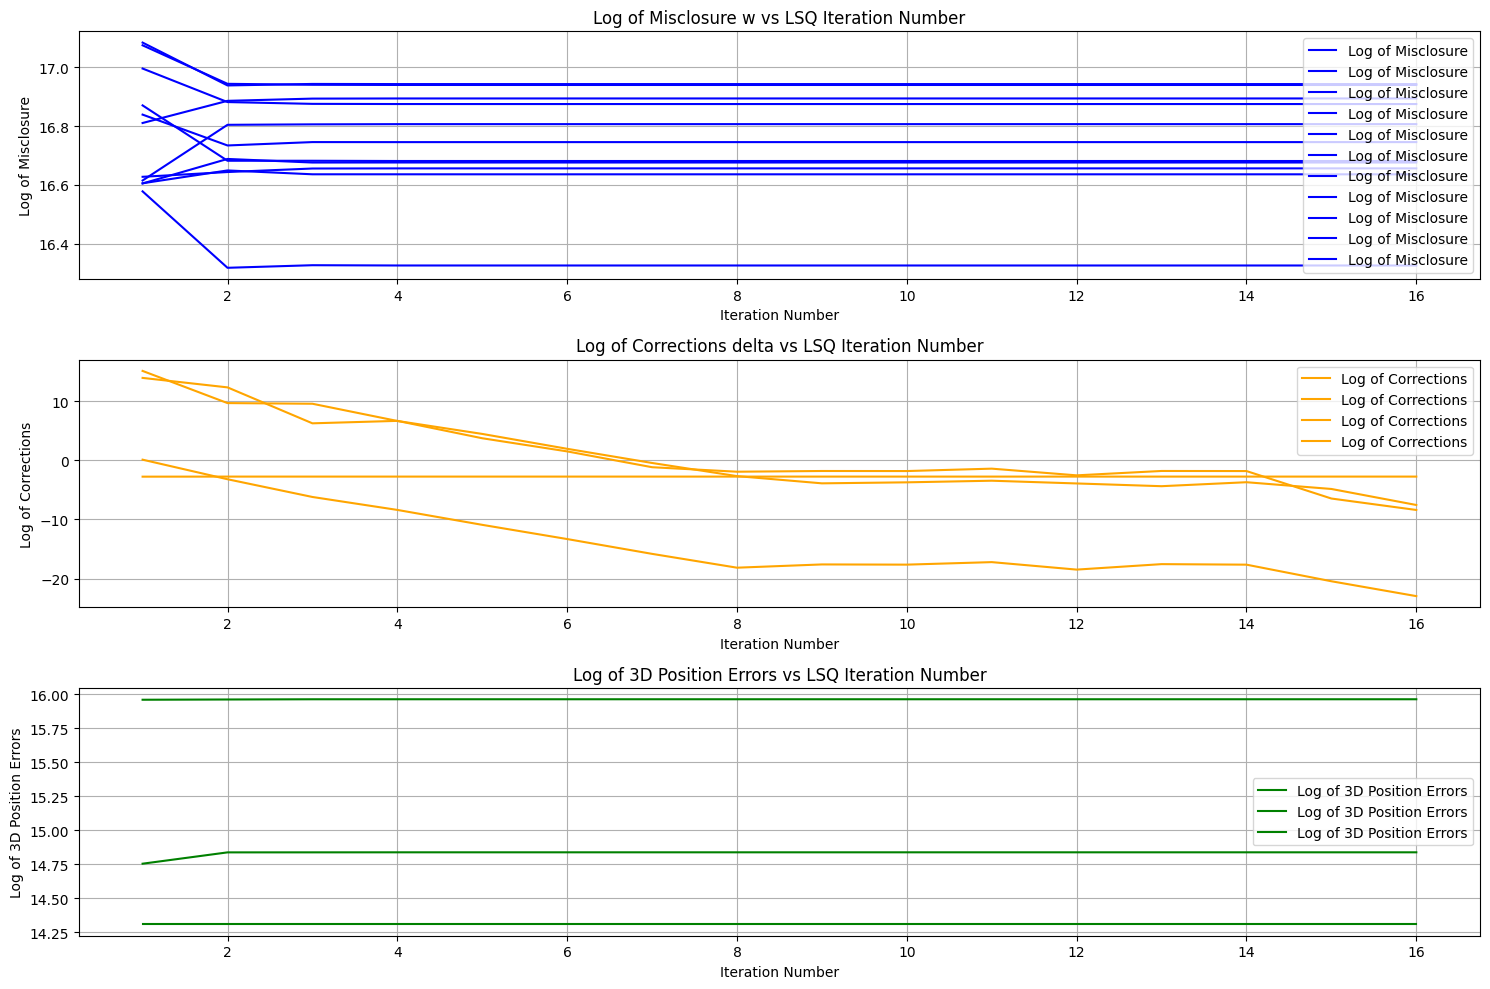

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
plt.figure(figsize=(15, 10))

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 1)
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log of Misclosure', color='blue')
plt.title('Log of Misclosure w vs LSQ Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Misclosure')
plt.grid()
plt.legend()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 2)
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Log of Corrections', color='orange')
plt.title('Log of Corrections delta vs LSQ Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Corrections')
plt.grid()
plt.legend()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 3)
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log of 3D Position Errors', color='green')
plt.title('Log of 3D Position Errors vs LSQ Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of 3D Position Errors')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
print("""
The Misclosure Log (Blue Top Plot) shows a range of starting misclosure values, which converge and stabilize over time.
This indicates that the misclosure discrepancy between observed and adjusted values diminishes with the number of iterations
in LSQ adjustment issues. The misclosure values settle after around two rounds, indicating a convergence point or solution.
The Log of Corrections (Orange, Middle Plot) shows a steady decrease in corrections throughout iterations, indicating a decrease
in the magnitude of the corrections.

This suggests that the solution is getting closer to convergence as the model adjustments get smaller with each iteration.
The 3D Position Error Log (Green Bottom Plot) shows a flat line, suggesting minimal changes in 3D location errors throughout
iterations. These graphs suggest a stable LSQ process, with the rapid drop and stabilization of misclosure, reduction in
corrections, and stability of 3D position errors.
""")


The Misclosure Log (Blue Top Plot) shows a range of starting misclosure values, which converge and stabilize over time.
This indicates that the misclosure discrepancy between observed and adjusted values diminishes with the number of iterations
in LSQ adjustment issues. The misclosure values settle after around two rounds, indicating a convergence point or solution.
The Log of Corrections (Orange, Middle Plot) shows a steady decrease in corrections throughout iterations, indicating a decrease
in the magnitude of the corrections.

This suggests that the solution is getting closer to convergence as the model adjustments get smaller with each iteration.
The 3D Position Error Log (Green Bottom Plot) shows a flat line, suggesting minimal changes in 3D location errors throughout
iterations. These graphs suggest a stable LSQ process, with the rapid drop and stabilization of misclosure, reduction in
corrections, and stability of 3D position errors.



In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
